In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sym
from IPython.display import Math
from fractions import Fraction

# Random Numbers

**Random Uniform distribution**

In [2]:
nums = np.random.rand(10000)   #Uniform distribution

min_val = 2
max_val = 17

nums = nums*(max_val-min_val) + min_val #stretching distribution between 2 and 17

#nums +=3    #starts at 3

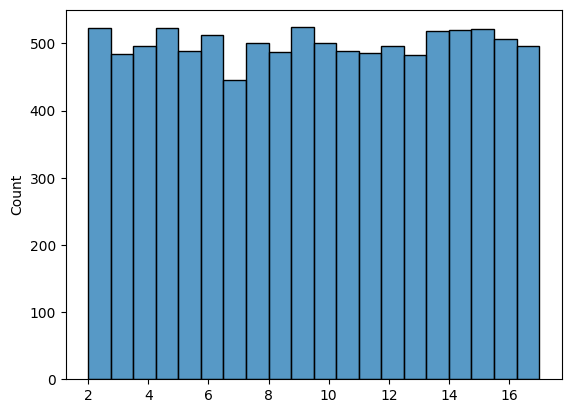

In [3]:
sns.histplot(nums, bins=20);

**Random Normal distribution**

In [4]:
nums = np.random.randn(100000)

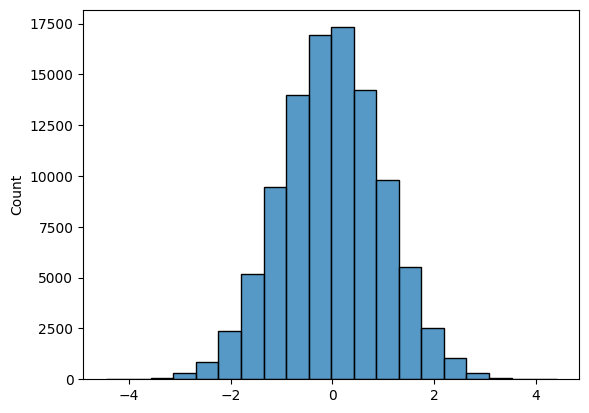

In [5]:
sns.histplot(nums, bins=20);

**Generate a normal distribution with mean = 15, sd = 4.3**

Mean: 15.0, STD: 4.3


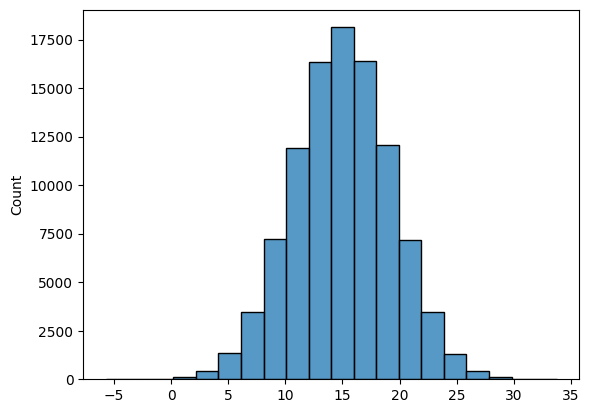

In [6]:
nums = np.random.randn(100000)   

nums = nums - nums.mean() #standarization to have exactly the desired mean
nums = nums/ nums.std() #standarization to have exactly the desired std.

nums = nums * 4.3 # giving it std = 4.3
nums = nums + 15 #making mean = 15

print(f"Mean: {nums.mean()}, STD: {nums.std()}")
sns.histplot(nums, bins=20);

Mean: 15.013906686654657, STD: 4.290284967009537


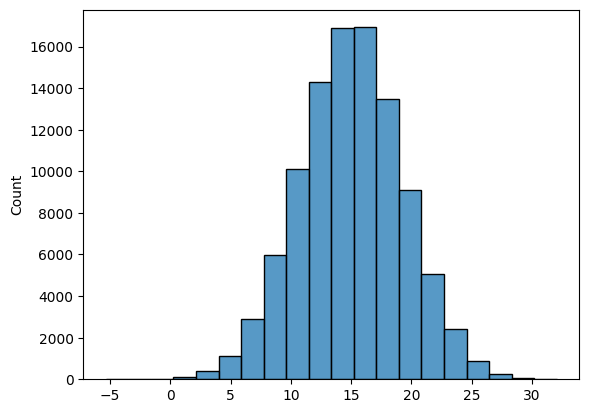

In [7]:
from scipy.stats.distributions import norm
nums = norm(loc=15, scale=4.3).rvs(100000)
print(f"Mean: {nums.mean()}, STD: {nums.std()}")
sns.histplot(nums, bins=20);

**Plot unit vectors with random phase angles**

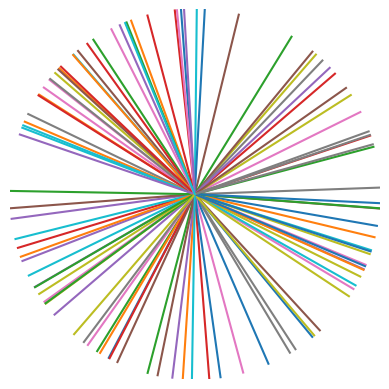

In [8]:
angles = np.random.randn(100)*np.pi
#angles = np.random.rand(100)

for a in angles:
    plt.plot([0,np.cos(a)],[0,np.sin(a)]);
    
plt.axis("square");
plt.axis([-1,1,-1,1])
plt.axis("off");

# Circles, radians and degrees

$$ 2\pi = 360° $$

$$ 2\pi \text{ radians}= 360° degrees $$

$$ rad. = \frac{360}{2\pi} = \frac{180}{\pi} $$

In [9]:
deg = 1241244

rad = deg*np.pi/180
rad = rad%(2*np.pi)

print("%g degrees is %g radians." %(deg, rad))

1.24124e+06 degrees is 5.65487 radians.


In [10]:
rad = 4*np.pi

deg = (180*rad/np.pi)%360
deg

0.0

In [11]:
deg = 300

rad = np.deg2rad(deg)%(2*np.pi)
rad

5.235987755982989

In [12]:
rad = 5*np.pi 

deg =np.rad2deg(rad)%360
deg

180.0

In [13]:
np.sin(5*np.pi )

6.123233995736766e-16

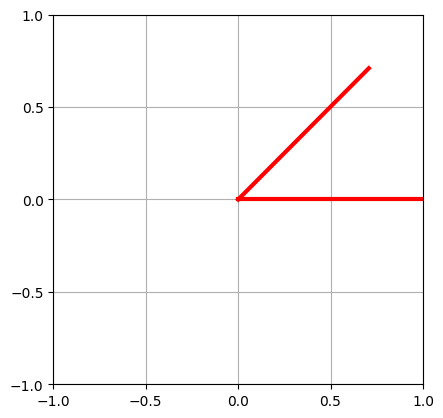

In [14]:
rad = np.pi/4

plt.plot([0,1],[0,0], "r", lw=3);
plt.plot([0,np.cos(rad)], [0,np.round(np.sin(rad),2)], "r", lw=3);
plt.axis("square");
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.grid(axis="both")
plt.locator_params(axis='both', nbins=4);

In [15]:
def angle_convert_plot():
    
    playing =True
    while playing:
        
        try:
            angle = float(input("What angle to convert?: ")) #or use eval instead of float.
        except ValueError:
            print("Please enter a number")
            continue
        
        unit_define = True
        while unit_define:

            unit = input("What unit did you input (radian or degree)?: ").lower()

            if unit not in ["radian","degree"]:
                print("Please enter a valid unit")
                continue
                
            else:
                unit_define=False
        
        
        if unit == "radian":
            
            rad = angle%(2*np.pi)
            degree = np.round(np.rad2deg(angle)%360,2)
            
            plt.plot([0,1],[0,0], "r", lw=3);
            plt.plot([0,np.cos(angle)], [0,np.round(np.sin(angle),2)], "r", lw=3);
            plt.title(f"Angle of {degree}°, or {np.round(rad,2)} ({np.round(angle,2)})rad.")
            plt.axis("square");
            plt.xlim([-1,1])
            plt.ylim([-1,1])
            plt.grid(axis="both")
            plt.locator_params(axis='both', nbins=4);
            
            playing=False
            
        elif unit == "degree":
            
            input_deg = angle
            degree = angle%360
            angle = np.deg2rad(angle)
            rad = angle%(2*np.pi)
            
            plt.plot([0,1],[0,0], "r", lw=3);
            plt.plot([0,np.cos(angle)], [0,np.round(np.sin(angle),2)], "r", lw=3);
            plt.title(f"Angle of {degree}° ({input_deg}°), or {np.round(rad,2)} rad.")
            plt.axis("square");
            plt.xlim([-1,1])
            plt.ylim([-1,1])
            plt.grid(axis="both")
            plt.locator_params(axis='both', nbins=4);
            
            playing=False
    

What angle to convert?: 40
What unit did you input (radian or degree)?: degree


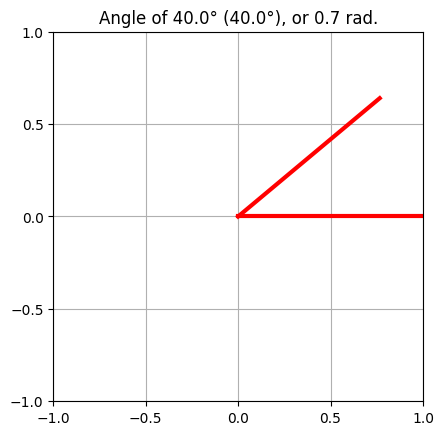

In [16]:
angle_convert_plot()

# The pythagorean theorem

If a triangle has 1 angle of 90°degrees:

$$ a^2 + b^2 = c^2 $$

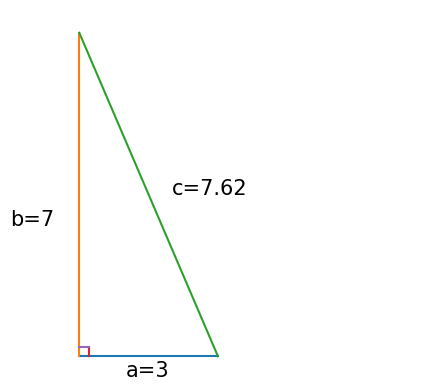

In [17]:
a = 3
b = 7

c = np.round(np.sqrt(a**2 + b**2),2)

# draw the triangle
plt.plot([0,a],[0,0])
plt.plot([0,0],[0,b])
plt.plot([0,a],[b,0]);

plt.plot([0.2,0.2],[0,0.2])
plt.plot([0,0.2],[0.2,0.2])
plt.axis("square");

plt.text(a/3, -.45, "a="+ str(a), fontsize=15)
plt.text(-1.5, b/3+ 0.5, "b="+ str(b), fontsize=15)
plt.text(a/2 + 0.5, b/2 , "c=" + str(c), fontsize=15)

axlim = np.max([a,b]) + 0.5
plt.axis([-0.5, axlim, -0.5, axlim]);
plt.axis("off");

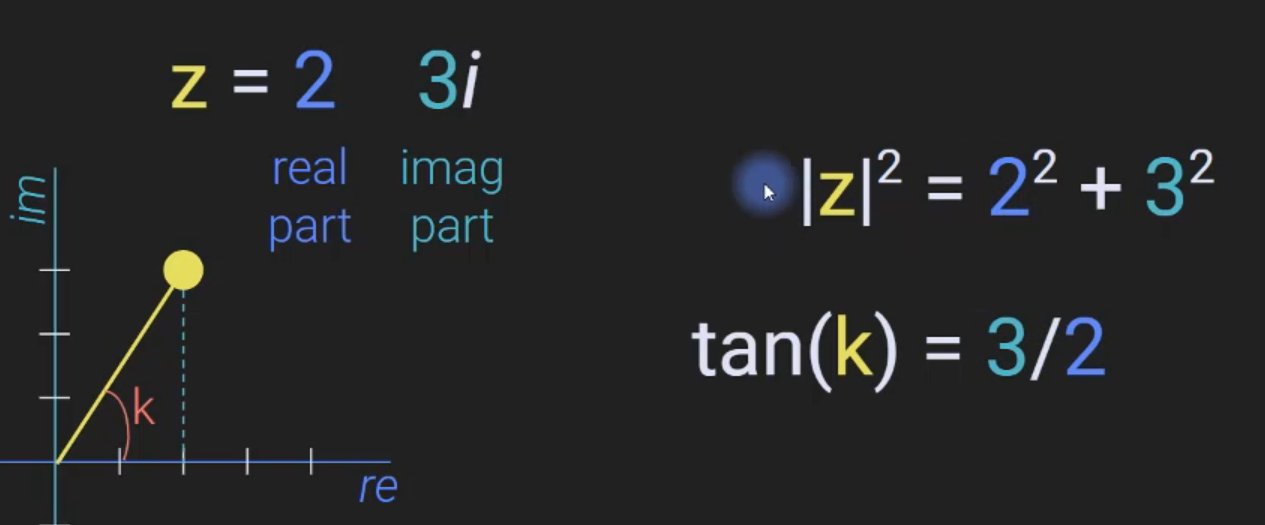

In [18]:
z = complex(3,4)

mag = np.sqrt(np.real(z)**2 + np.imag(z)**2)
k = np.arctan2(np.imag(z), np.real(z))

print(mag)
print(k)

5.0
0.9272952180016122


# Computing and graphing sine, cosine, tangent

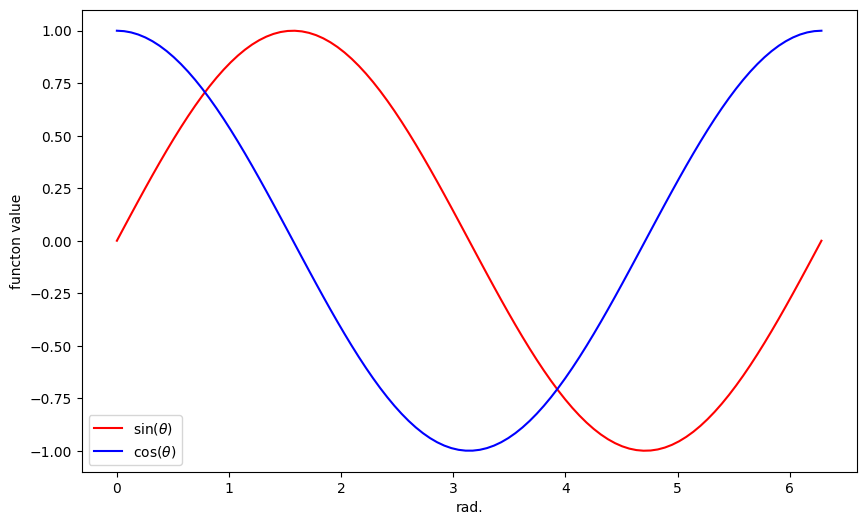

In [19]:
x = np.linspace(0,2*np.pi,100)


plt.figure(figsize=(10,6),dpi=100)
plt.plot(x,np.sin(x),"r",label="$\\sin(\\theta)$")
plt.plot(x,np.cos(x) ,"b",label="$\\cos(\\theta)$")
#plt.plot(x,np.cos(x - np.pi/2) ,"b",label="$\\cos(\\theta)$")   #this is the same as the sin plot because -np.pi/2
plt.legend();
plt.xlabel("rad.")
plt.ylabel("functon value");

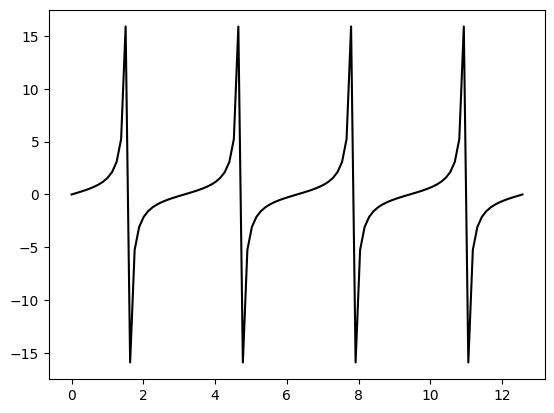

In [20]:
th = np.linspace(0, 4*np.pi, 101)

plt.plot(th,np.tan(th),"k");

In [21]:
ang = np.random.rand(10000)*2*np.pi
tan = np.tan(ang)
sc = np.sin(ang) / np.cos(ang)

(-100.0, 100.0)

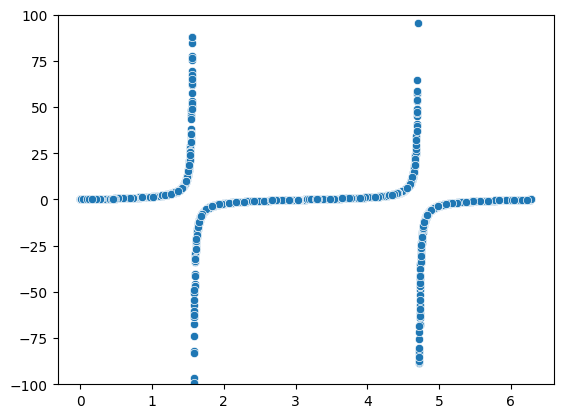

In [22]:
sns.scatterplot(x=ang , y=tan);
plt.ylim([-100,100])

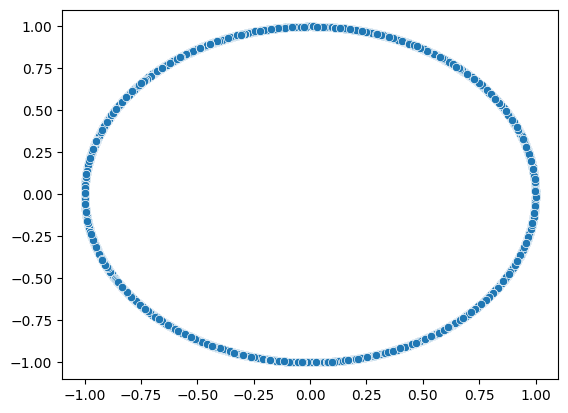

In [23]:
ang = np.random.rand(10000)*2*np.pi

sns.scatterplot(x=np.cos(ang), y = np.sin(ang));

$$ cos^2 + sin^2 = 1 $$

In [24]:
thetas = np.linspace(0,2*np.pi,13)
results = np.cos(thetas)**2 + np.sin(thetas)**2

print(results)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Exercises**<br>
_________________________________________________________________________<br>
**Exercise 1**
$$ y_{1} = sin(\theta + cos(\theta)) $$
$$ y_{2} = cos(\theta + sin(\theta)) $$

_________________________________________________________________________<br>
**Exercise 2**

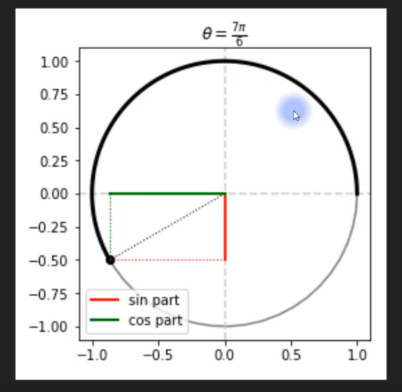

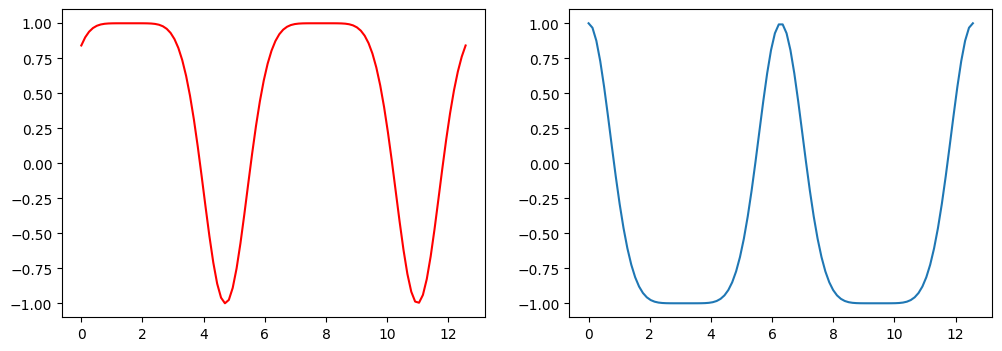

In [25]:
x = np.linspace(0,4*np.pi,100)

y1 = np.sin(x + np.cos(x))

y2 = np.cos(x + np.sin(x))


plt.figure(figsize=(12,4),dpi=100)

plt.subplot(1,2,1)
plt.plot(x,y1, color="red")

plt.subplot(1,2,2)
plt.plot(x,y2);

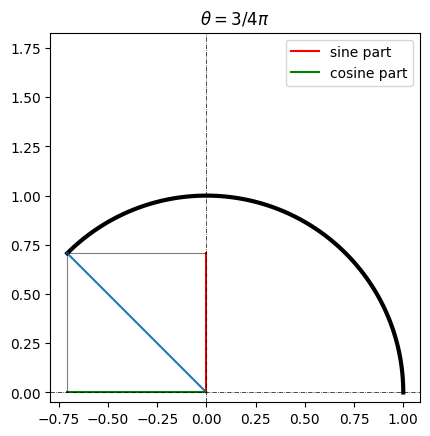

In [26]:
n1 = Fraction(3,4)
n = n1 * np.pi

#thsym = sym.pi * 3/16
#n = float(thsym)

x = np.linspace(0, n,100)

plt.plot(np.cos(x),np.sin(x), lw=3, color="k");
plt.plot([np.cos(x[-1]),0], [np.sin(x[-1]),0])
plt.plot([0,0],[0,np.sin(x[-1])],label="sine part", color="red");
plt.plot([0,np.cos(x[-1])],[0,0],label="cosine part", color="green");
plt.plot([np.cos(x[-1]), np.cos(x[-1])], [np.sin(x[-1]),0], color="k", alpha=0.5, lw=0.8)
plt.plot([np.cos(x[-1]), 0], [np.sin(x[-1]),np.sin(x[-1])], color="k", alpha=0.5, lw=0.8)
if n1:
    plt.title(f"$\\theta = {n1}\\pi $")
#else:
   # plt.title(f"$\\theta = {sym.latex(thsym)} $")
plt.axhline(y=0, color="k", ls="-.", lw=0.5);
plt.axvline(x=0, color="k", ls="-.", lw=0.5);
plt.axis("square");
plt.legend();

# Euler's formula

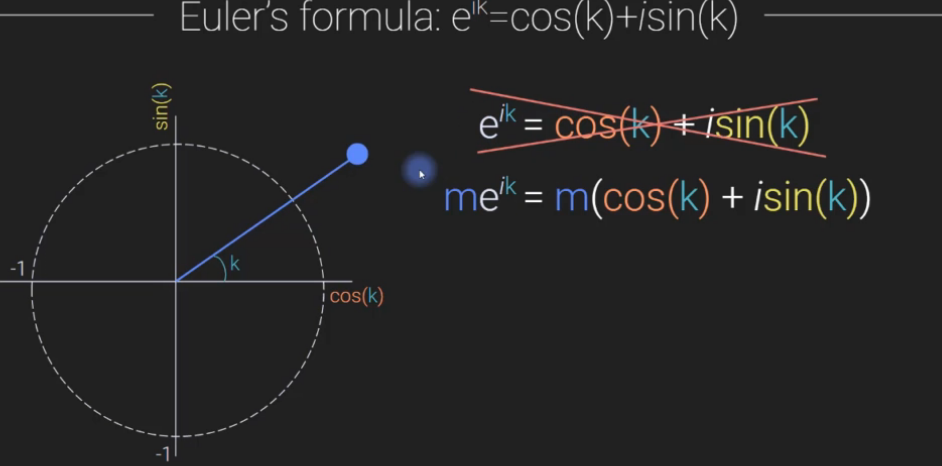

$$ e^\left(i0\right) = 1 + 0i $$
$$ e^\frac{i\pi}{2} = 0 + 1i $$
$$ e^\left(i\pi\right) = -1 + 0i $$

$$ \large e^\left(i\pi\right) + 1 = 0 $$

In [29]:
k = np.pi/6
m = 2.3

euler = m * np.exp(1j * k)
cis = m * (np.cos(k) + 1j * np.sin(k))

euler == cis

True

2.3 2.3
0.5235987755982988 0.5235987755982987


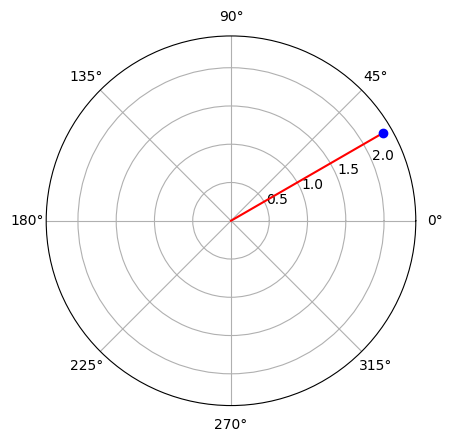

In [31]:
mag = np.abs(euler)
ang = np.angle(euler)

print(m,mag)
print(k,ang)

plt.polar([0,ang], [0,mag],"r");
plt.polar( ang , mag,"bo");

In [63]:
def euler_cos_sin(cosine_part,sin_part):
    
    if isinstance(cosine_part,(int,float)) and isinstance(sin_part,(int,float)):
        
        m = np.sqrt(cosine_part**2 + sin_part**2) 
        rad = np.arctan2(sin_part,cosine_part)   # k = arctan(sin/cos)

        deg = np.rad2deg(rad)

        plt.polar([0,rad],[0,m])
        plt.polar( rad, m,"bo");
        plt.title("me$^{i\\phi}$, m =%g, $\\phi$ = %g or %g°" %(m, rad ,deg))
        plt.thetagrids([45,180,225,360])
        plt.show()
    
    else:
        print("datatypes must be numeric")

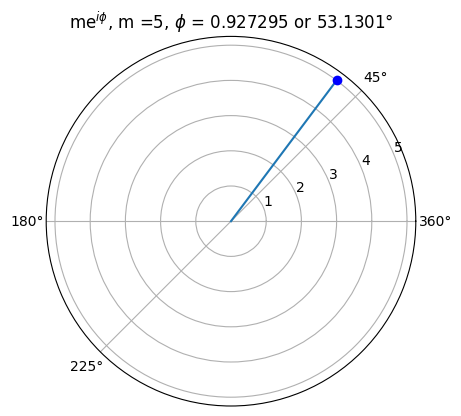

In [66]:
euler_cos_sin(3,4)

Random exploding Euler

In [ ]:
from itertools import chain

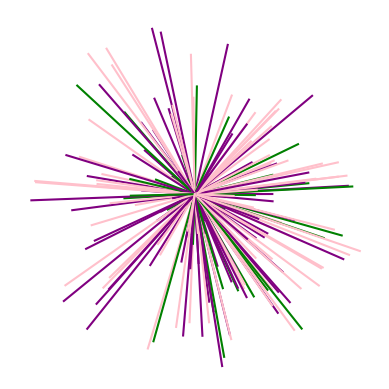

In [151]:
nums_sin = np.random.rand(200)   #Uniform distribution
nums_cos = np.random.rand(200)

min_val = 0
max_val = np.pi*2

sin_part = nums_sin*(max_val-min_val) + min_val  #stretching distribution between -10 and 10.
cos_part = nums_cos*(max_val-min_val) + min_val

m = np.sqrt(cos_part**2 + sin_part**2) 
rad = np.arctan2(sin_part,cos_part)   # k = arctan(sin/cos)


lis = []
lis.append(["pink"]*4)
lis.append(["purple"]*4)
lis.append(["green"]*2)
colors = list(chain(*lis))

for tup in tuple(zip(m,rad)):
    
    #other options to choose colors:
#     r = np.random.rand()
#     if r<0.4:
#         clr = [1, 0.2, 0.7] #pink
#     elif r>=0.4 and r<0.8:
#         clr = [0.7,0.2,1] #purple
#     else:
#         clr = [0,1,0] # green
    
    
    radians,magnitude = tup
    plt.polar([0,radians],[0,magnitude], color=random.choice(colors))
    plt.axis("off")
    plt.thetagrids([])

Random snakes from trigonometry

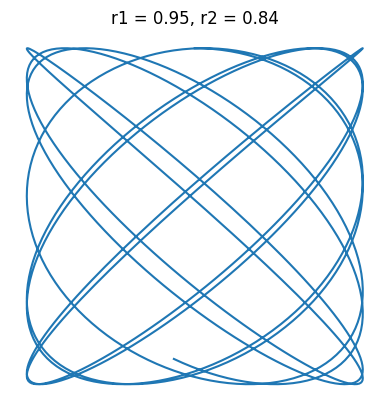

In [185]:
r1 =  np.random.rand()
r2 = np.random.rand()

theta = np.linspace(0,18*np.pi,1000)

plt.plot(np.sin(r1*theta), np.cos(r2*theta));
plt.axis("square")
plt.axis("off")
plt.title(f"r1 = {round(r1,2)}, r2 = {round(r2,2)}");

In [ ]:
np.append()